Chapter 4 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/9780521542616) concerns different coordinate systems and how to navigate between these. To illustrate the power of coordinate transformations, let us consider the Gaussian function. Gaussians play an important role in probablity and inverse theory, and as we'll see, its integral comes up in often in Physical problems.

In its most general form, the Gaussian is $$ f(x)=ae^{-{\frac {(x-b)^{2}}{2c^{2}}}}.$$ First, we will define a function for Gaussians:

In [3]:
import numpy as np

def gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

Let us plot a specific Gaussian for $a=c=1, b=0$. In other words, $f(x)=e^{-x^{2}}$

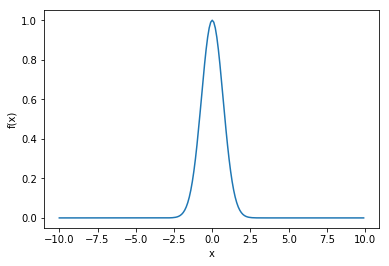

In [5]:
import matplotlib.pyplot as plt

a=1
b=0
c=np.sqrt(1/2)
dx=0.1
x = np.arange(-10,10,dx)

plt.plot(x,gaussian(x,a,b,c))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

It may or may not be obvious from the graph and/or the equation, but $a$ controls the height of the bell curve, $b$ determines the horizontal position, and $c$ the width of the curve.

The area under this curve, the integral: $$\int _{-\infty }^{\infty }e^{-x^{2}}dx$$ is of interest in many Physics problems. In our book, we need to determine this integral to find the Green's function for the heat equation, for example. The solution is not so simple, because there is no analytic anti-derivative for this problem. One option is always to approximate an integral numerically. Let's try that, and in the process learn some new python tricks!

The Gausian integral is the area under this curve. One option is turn this area into skinny rectangles of width $dx$ and add the areas of each rectangle. A function to compute the area of all the rectangles made up of height $f(x)$ and width $dx$ is 

In [6]:
def g(a,b,c,x,dx):
    return np.sum(gaussian(x,a,b,c)*dx)

In [7]:
print(g(a,b,c,x,dx))

1.7724538509055225


Apparently, this is the numerical estimate of the aread under our Gaussian. To confirm, we can take advantage of the numerical integration capabilities in Python, with the [quad function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) in the scipy package. (And numpy even knows about infinity!)

In [8]:
from scipy.integrate import quad
ans, err = quad(gaussian, -np.inf, np.inf,args =(a,b,c))
print(ans)

1.772453850905516


Our two results agree to many significant digits, despite one of the methods being our "crude" summation of rectangles, limited to the region between -10 and 10. But what does this 1.77245 value mean?

Let's see if we cannot get an analytic solution to shed some light on this.
$$
\int _{-\infty }^{\infty }e^{-x^{2}}dx =
\sqrt{\int _{-\infty }^{\infty }\int _{-\infty }^{\infty }e^{-x^{2}-y^2}dx dy}$$

It appears we made the problem harder, not easier, by going from a 1D integral to one in two dimensions, but $x^2+y^2 = r^2$, the radius of this 2-dimensional Gaussian, and we can solve the integral in polar coordinates:

\begin{align}
\int _{-\infty }^{\infty }e^{-x^{2}}dx =
\sqrt{\int _{-\infty }^{\infty }\int _{-\infty }^{\infty }e^{-x^{2}-y^2}dx dy} \\
\sqrt{\int _{-\infty }^{\infty }\int_0^{2\pi}e^{-r^{2}} rdr d\theta}
\end{align}

How the integration area dxdy in polar coordinates becomes $rdrd\theta$ (with an "extra" $r$) is explained in Chapter 4 of our book. This factor forms the "Jacobian" of the transfer from Cartesian to Polar coordidates. We can, however, present some intuitive insight to the elementary area of Cartesian and polar coordinates. The Cartesian element is $dA= dx dy$:

![cartesianelement.png](https://ndownloader.figshare.com/files/9928750)

In polar coordinates, the elementary area is a small arc length times a small but of radius: $dA = rd\theta dr$, as you can see in the drawing below. If the arc length is mysterious to you, consider putting so many of these together that you get a full circle: $\int_{2\pi}rd\theta = 2\pi r$:

![polarelement.png](https://ndownloader.figshare.com/files/9928753)

After the conversion to polar coordinates, we can determine the anti-derivative after a simple change of variables, and solve our original Gaussian integral:

\begin{align}
\iint_{-\infty}^\infty e^{-(x^{2}+y^{2})}dx dy &=\int _{0}^{2\pi }\int _{0}^{\infty }e^{-r^{2}}r\,dr\,d\theta \\&=2\pi \int _{0}^{\infty }re^{-r^{2}}\,dr\\&=2\pi \int _{-\infty }^{0}{\tfrac {1}{2}}e^{s}\,ds&&s=-r^{2}\\&=\pi \int _{-\infty }^{0}e^{s}\,ds\\&=\pi (e^{0}-e^{-\infty })\\&=\pi.
\end{align}

This means that our original problem is 
$$\int _{-\infty }^{\infty }e^{-x^{2}}dx = \sqrt{\iint_{-\infty}^\infty e^{-(x^{2}+y^{2})}dx dy}  = \sqrt{\pi}.$$
And let us check that against our numerical answer:

In [9]:
np.sqrt(np.pi)

1.7724538509055159

Lo and behold, our (two) numerical and analytic solutions agree! Chapter 4 explains how to go from 3D Cartesian to Spherical coordinates, which will prove handy when we get to 3D problems with such a spherical symmetry. Also, we may revisit the Gaussian function in our python notebook about the Dirac Delta function of Chapter 13.